# Linear Regression with Statsmodels and Scikit-Learn

Let's investigate the housing dataset with linear regression. We'll use two different packages and you can see examples for linear regression of each:
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Intro to Scikit-Learn

Scikit-learn is a machine learning package for python that includes a huge array of models including linear regression. Scikit-learn includes a number of sample data sets including the Boston housing data set. (We could also load the data with pandas as in the last lesson.)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
data = datasets.load_boston()

print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's take a minute to see what the data looks like.

In [3]:
print data.feature_names
print data.data[0]
print data.target[0]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


Scikit-learn has already split off the house value data into the target variable. Let's see how to build a linear regression. First let's put the data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM and LSTAT. Let's look at each individually and then both together.

Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems).

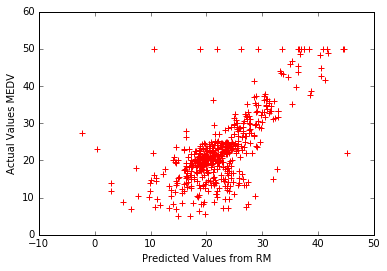

MSE: 43.6005517712


In [5]:
lm = linear_model.LinearRegression()

X = df[["RM"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

**Check**: How does this plot relate to the model? In other words, how are the independent variable (RM) and dependent variable ("MEDV") incorporated?

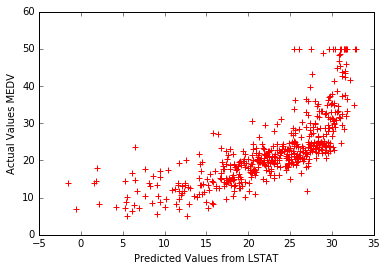

MSE: 38.4829672299


In [6]:
lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

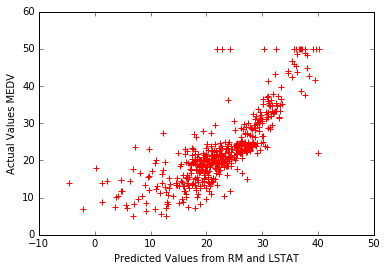

MSE: 30.5124687773


In [7]:
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

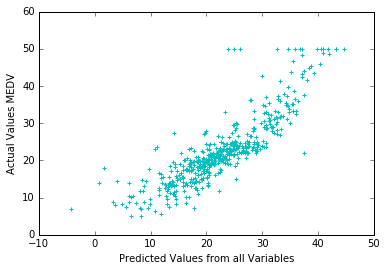

MSE: 21.8977792177


In [8]:
lm = linear_model.LinearRegression()

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = targets['MEDV']

model = lm.fit(X,y)
prediction  = model.predict(X)

plt.scatter(prediction, y, s=20, color="c", marker="+")
plt.xlabel("Predicted Values from all Variables")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(prediction, y)

## Intro to Statsmodels

Now let's see how to use another popular package for regressions.

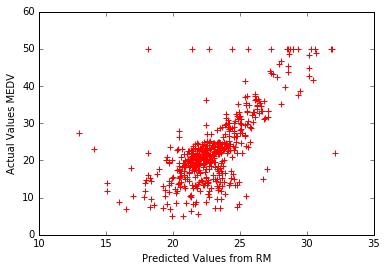

MSE: 58.4106354321


In [9]:
import statsmodels.api as sm

X = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Guided Practice

Compare this to the analgous fit from scikit-learn above.

### Exercises

Recreate the model fits above with `statsmodels`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?

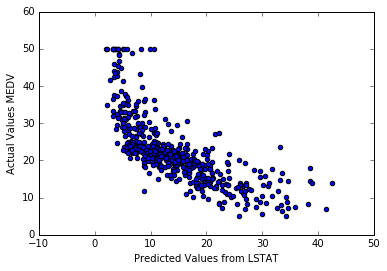

MSE: 326.480644353


In [10]:
# Start your exercises here
X = df["LSTAT"]
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.scatter(predictions, y)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(predictions, y)


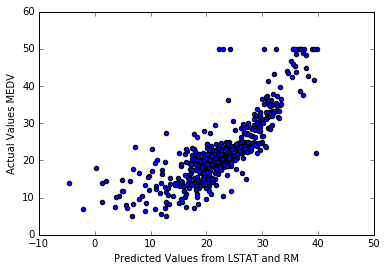

MSE: 21.8977792177


In [11]:
X = df[["LSTAT", "RM"]]
y = targets["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.scatter(predictions, y)
plt.xlabel("Predicted Values from LSTAT and RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(prediction, y)

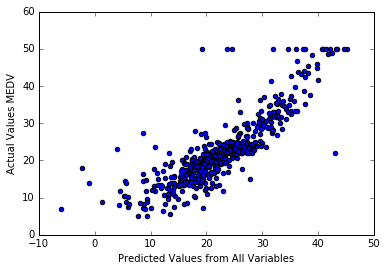

MSE: 24.1723662959


In [12]:
for variable in [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]:
    X = df[variable]
    y = targets["MEDV"]

    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    plt.scatter(predictions, y)
    plt.xlabel("Predicted Values from All Variables")
    plt.ylabel("Actual Values MEDV")
    plt.show()
print "MSE:", mean_squared_error(predictions, y)

## Independent Practice

Using our preference of `scikit-learn` or `statsmodels`, try to find the best models that you can that:
* use only two variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

In [13]:
# Start your exercises here

# Bonus Exercises

From the LSTAT plot you may have noticed that the relationship is not quite linear. Add a new column `"LSTAT2"` to your data frame for the LSTAT values squared and try to fit a quadratic function using `["LSTAT", "LSTAT2"]`. Is the resulting fit better or worse?

In [14]:
# Start your exercises here